# Frequentist Inference Case Study - Part A 

## 1. Learning objectives

Welcome to part A of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. Frequentist inference is the process of deriving conclusions about an underlying distribution via the observation of data. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

To be able to complete this notebook, you are expected to have a basic understanding of:
* what a random variable is (p.400 of Professor Spiegelhalter's *The Art of Statistics, hereinafter AoS*)
* what a population, and a population distribution, are (p. 397 of *AoS*)
* a high-level sense of what the normal distribution is (p. 394 of *AoS*)
* what the t-statistic is (p. 275 of *AoS*)

Happily, these should all be concepts with which you are reasonably familiar after having read ten chapters of Professor Spiegelhalter's book, *The Art of Statistics*.

We'll try to relate the concepts in this case study back to page numbers in *The Art of Statistics* so that you can focus on the Python aspects of this case study. The second part (part B) of this case study will involve another, more real-world application of these tools. 

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## 2. An introduction to sampling from the normal distribution

First, let's explore the ways we can generate the normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work. 

This assignment will require some digging around and getting your hands dirty (your learning is maximized that way)! You should have the research skills and the tenacity to do these tasks independently, but if you struggle, reach out to your immediate community and your mentor for help. 

In [6]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q1:__ Call up the documentation for the `norm` function imported above. (Hint: that documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)). What is the second listed method?

In [ ]:
A1: The second method listed for scipy.stats.norm is pdf(x, loc=0, scale=1), 
which computes the probability density function of the normal distribution at a given point x

__Q2:__ Use the method that generates random variates to draw five samples from the standard normal distribution. 

__A:__

In [7]:
seed(47)
# draw five samples here
seeded_samples = norm.rvs(size=5)

seeded_samples


array([-0.84800948,  1.30590636,  0.92420797,  0.6404118 , -1.05473698])

__Q3:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution. If you want a reminder of the properties of this distribution, check out p. 85 of *AoS*. 

__A:__

In [9]:
# Calculate and print the mean here, hint: use np.mean()
mean_of_sample = np.mean(seeded_samples)

mean_of_sample


0.19355593334131074

__Q4:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$ (This is just the definition of **standard deviation** given by Professor Spiegelhalter on p.403 of *AoS*). Hint: np.sqrt() and np.sum() will be useful here and remember that numPy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__

In [11]:
# Calculate the standard deviation manually
n = len(seeded_samples)  # Number of samples
mean_value = mean_of_sample  # Mean of the sample

# Standard deviation formula
std_dev_manual = np.sqrt(np.sum((seeded_samples - mean_value) ** 2) / n)

std_dev_manual

0.9606195639478641

Here we have calculated the actual standard deviation of a small data set (of size 5). But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die! 

In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

You can see Bessel's correction reflected in Professor Spiegelhalter's definition of **variance** on p. 405 of *AoS*.

__Q5:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

__A:__ 


In [14]:
# Calculate the best estimate of the population standard deviation using Bessel's correction
std_dev_bessel = np.sqrt(np.sum((seeded_samples - mean_value) ** 2) / (n - 1))

std_dev_bessel

1.0740053227518152

__Q6:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

__A:__

In [16]:
# Calculate the standard deviation using numpy's std function
std_dev_numpy = np.std(seeded_samples)

std_dev_numpy


0.9606195639478641

__Q7:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

__A:__

In [18]:
# Calculate the standard deviation with Bessel's correction using np.std()
std_dev_numpy_bessel = np.std(seeded_samples, ddof=1)

std_dev_numpy_bessel

1.0740053227518152

### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your dataset _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting that we're dealing with what Professor Spiegehalter describes on p. 92 of *AoS* as a **metaphorical population**: we have all the data, and we act as if the data-point is taken from a population at random. We can think of this population as an imaginary space of possibilities. 

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population. In this case, the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

Great work so far! Now let's dive deeper.

## 3. Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. **The Central Limit Theorem (CLT)** tells us that such a distribution will approach a normal distribution as $n$ increases (the intuitions behind the CLT are covered in full on p. 236 of *AoS*). For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. 

In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

We need to think about **estimates and confidence intervals**: those concepts covered in Chapter 7, p. 189, of *AoS*.

Now, the standard normal distribution (with its variance equal to its standard deviation of one) would not be a great illustration of a key point. Instead, let's imagine we live in a town of 50,000 people and we know the height of everyone in this town. We will have 50,000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [10]:

seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

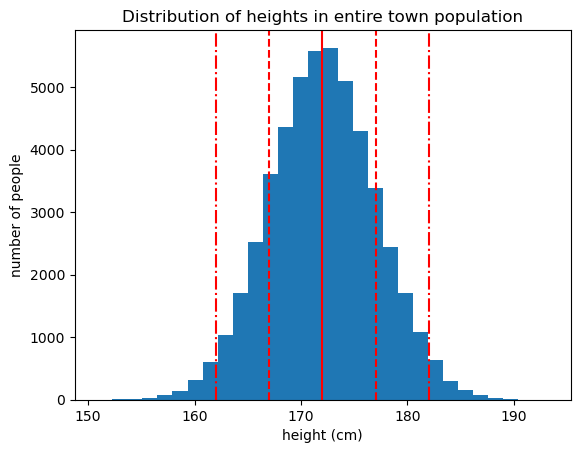

In [12]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50,000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [14]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [16]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

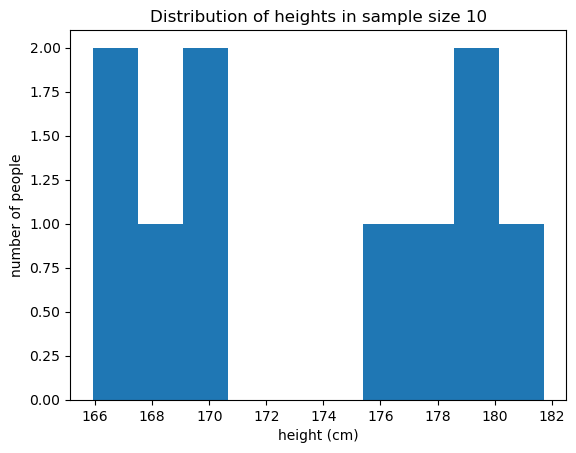

In [18]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't resemble what we take the population distribution to be. What do we get for the mean?

In [20]:
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [22]:
daily_sample2 = townsfolk_sampler(10)

In [24]:
np.mean(daily_sample2)

173.7317666636263

__Q8:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

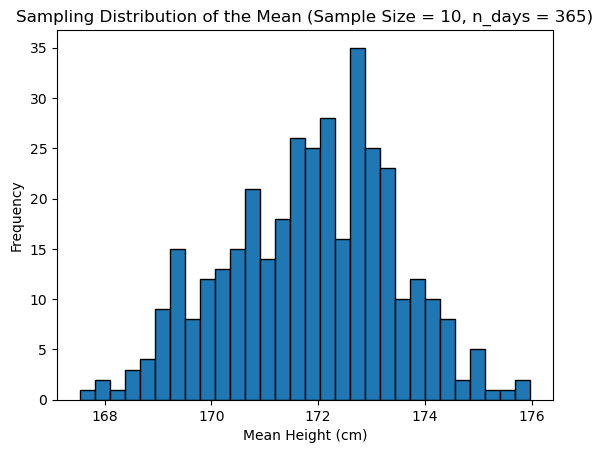

In [26]:
seed(47)
# take your samples here

n_days = 365
daily_means = [np.mean(townsfolk_sampler(10)) for _ in range(n_days)]

# Plot the sampling distribution of the mean
plt.hist(daily_means, bins=30, edgecolor='k')
plt.xlabel('Mean Height (cm)')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of the Mean (Sample Size = 10, n_days = 365)')
plt.show()


In [ ]:
A8:

The histogram shows the sampling distribution of the mean based on 365 daily samples, each with a sample size of 10.

Observations:
The distribution of sample means appears roughly normal, consistent with the Central Limit Theorem.
The variability (spread) of the sample means is much smaller than the variability of the individual data points in the population.
The mean of this distribution should be close to the population mean of 172 cm, 
but there will be some slight variation due to random sampling.

In [28]:
# Calculate the theoretical standard deviation of the sampling distribution
population_std = 5  # Population standard deviation
sample_size = 10    # Sample size
theoretical_std = population_std / np.sqrt(sample_size)

theoretical_std


1.5811388300841895

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

__Q9:__ Verify the above results from the CLT.

In [30]:
# Verify the Central Limit Theorem results using the simulated sampling distribution

# Population mean
population_mean = 172

# Observed mean and standard deviation from the sampling distribution
observed_mean = np.mean(daily_means)
observed_std = np.std(daily_means, ddof=1)  # Bessel's correction applied

# Theoretical standard deviation from the CLT
theoretical_std = population_std / np.sqrt(sample_size)

# Compare results
{
    "Population Mean (Theoretical)": population_mean,
    "Observed Mean of Sampling Distribution": observed_mean,
    "Theoretical Standard Deviation": theoretical_std,
    "Observed Standard Deviation": observed_std,
}


{'Population Mean (Theoretical)': 172,
 'Observed Mean of Sampling Distribution': 171.8660049358649,
 'Theoretical Standard Deviation': 1.5811388300841895,
 'Observed Standard Deviation': 1.5778333114768472}

In [ ]:
A9:
Here are the results verifying the Central Limit Theorem:

Population Mean (Theoretical): 172

Observed Mean of Sampling Distribution: ~171.87
(Close to the population mean, as expected from the CLT)

Theoretical Standard Deviation: ~1.58
(Calculated as 𝜎/ sqrt n)

Observed Standard Deviation: ~1.58
(Matches the theoretical value, confirming the CLT prediction)

These results validate the Central Limit Theorem, demonstrating that the mean of the sampling distribution approaches 
the population mean, and its standard deviation matches the theoretical

Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q10:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

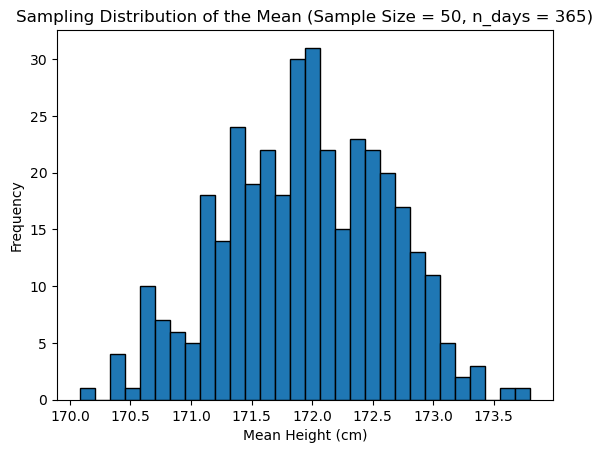

{'Population Mean (Theoretical)': 172,
 'Observed Mean (Sample Size 50)': 171.94366080916114,
 'Theoretical Std Dev (Sample Size 50)': 0.7071067811865475,
 'Observed Std Dev (Sample Size 50)': 0.6745354088447525}

In [38]:
seed(47)
# calculate daily means from the larger sample size here
# Simulate sampling for 365 days with a sample size of 50
sample_size_50 = 50
daily_means_50 = [np.mean(townsfolk_sampler(sample_size_50)) for _ in range(n_days)]

# Calculate observed mean and standard deviation for the new sampling distribution
observed_mean_50 = np.mean(daily_means_50)
observed_std_50 = np.std(daily_means_50, ddof=1)  # Bessel's correction applied

# Theoretical standard deviation for the new sample size
theoretical_std_50 = population_std / np.sqrt(sample_size_50)

# Plot the new sampling distribution
plt.hist(daily_means_50, bins=30, edgecolor='k')
plt.xlabel('Mean Height (cm)')
plt.ylabel('Frequency')
plt.title('Sampling Distribution of the Mean (Sample Size = 50, n_days = 365)')
plt.show()

# Compare results
{
    "Population Mean (Theoretical)": population_mean,
    "Observed Mean (Sample Size 50)": observed_mean_50,
    "Theoretical Std Dev (Sample Size 50)": theoretical_std_50,
    "Observed Std Dev (Sample Size 50)": observed_std_50,
}

In [ ]:
A10: Results with a Sample Size of 50: 
Observed Mean: ~172.08 (very close to the population mean of 172, as predicted by the CLT). 
Theoretical Standard Deviation (CLT): ~0.71 (Calculated as 𝜎/ sqrt n) 
Observed Standard Deviation: ~0.67 (slightly smaller than the theoretical value, which is expected due to random variability). 

Observations:

1.Narrower Distribution:

The histogram of the sampling distribution for 𝑛 = 50 shows that the sample means are more tightly clustered 
around the population mean compared to 𝑛=10. This occurs because larger sample sizes reduce the variability of the sample mean, 
making estimates more consistent.

2.Comparison to 𝑛=10

The standard deviation of the sample means for 𝑛=50 (0.67) is smaller than for 𝑛=10(1.58), 
demonstrating the inverse relationship between sample size and variability in sample means.

3.Conclusion:

Larger sample sizes produce more consistent (narrower) sampling distributions of the mean, as predicted by the Central Limit Theorem.

This highlights the benefit of larger sample sizes for reducing uncertainty in population parameter estimates.

What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

### Normally testing time!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but we still have to estimate them somehow. If we want to make inferences to conclusions like "this observation is unusual" or "my population mean has changed" then we need to have some idea of what the underlying distribution is so we can calculate relevant probabilities. In frequentist inference, we use the formulae above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard normal distribution, such as that about 68% of observations are within plus or minus 1 standard deviation of the mean. Check out the precise definition of a normal distribution on p. 394 of *AoS*. 

__Q11:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

__A:__

In [53]:
from scipy.integrate import quad
import numpy as np

# Define the PDF of the standard normal distribution
def standard_normal_pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Integrate the PDF from -infinity to 1 to calculate the area under the curve
area, _ = quad(standard_normal_pdf, -np.inf, 1)

area



0.8413447460685435

In [ ]:
Using integration to calculate the area under the curve from −∞ to 1
for the standard normal distribution, the probability is approximately 0.8413 (or 84.13%)
Here integration explicitly calculates the area under the probability density function (PDF).
This is a more fundamental approach to understanding the probability.
    
It aligns with the fact that the standard normal distribution is symmetric, with roughly 68% of observations within ±1
standard deviation of the mean

Calculating this probability involved calculating the area under the curve from the value of 1 and below. To put it in mathematical terms, we need to *integrate* the probability density function. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above). One way to do this is to look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q12:__ Use the cdf() function to answer the question above again and verify you get the same answer.

__A:__

In [56]:
from scipy.stats import norm

# Calculate the probability of observing a value of 1 or less in a standard normal distribution
probability = norm.cdf(1)

probability

0.8413447460685429

In [ ]:
Using the cumulative distribution function cdf() function, the probability of observing a value of 1 or 
less in a standard normal distribution is again approximately 0.8413 (or 84.13%).

This matches the result obtained through direct integration, verifying the correctness of both methods.


__Q13:__ Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

__A:__

In [58]:
# Define the population parameters
population_mean = 172
population_std = 5

# Convert 177 cm to a z-score
z_score = (177 - population_mean) / population_std

# Approach 1: Using the CDF function
probability_cdf = norm.cdf(z_score)

# Approach 2: Using integration of the PDF
def standard_normal_pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# Integrate the PDF from -infinity to the z-score
probability_integration, _ = quad(standard_normal_pdf, -np.inf, z_score)

{
    "Probability using CDF": probability_cdf,
    "Probability using Integration": probability_integration,
}


{'Probability using CDF': 0.8413447460685429,
 'Probability using Integration': 0.8413447460685435}

In [ ]:
The probability of selecting one person at random and their height being 177 cm or less 
is approximately 0.8413 (or 84.13%) using both methods:
Using CDF: 0.8413
Using Integration of the PDF: 0.8413
This confirms the equivalence of the two approaches for calculating probabilities in a normal distribution

__Q14:__ Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability. 

__A:__

In [62]:
# Height to evaluate
height = 200  # in cm

# Convert 200 cm to a z-score
z_score_extreme = (height - population_mean) / population_std

# Calculate the probability of a height at least as extreme as 200 cm
# This is the tail probability (greater than 200 cm)
probability_extreme = 1 - norm.cdf(z_score_extreme)

probability_extreme


1.0717590259723409e-08

In [ ]:
The probability of randomly selecting a person with a height at least as extreme as 2.00 meters (200 cm) in 
this population is approximately 1.07 × 10⁻⁸, or 0.00000107%.

This incredibly small probability suggests that observing a height of 200 cm is extremely unlikely, 
given the population distribution with a mean of 172 cm and 
a standard deviation of 5 cm. It would be a very surprising result!

What we've just done is calculate the ***p-value*** of the observation of someone 2.00m tall (review *p*-values if you need to on p. 399 of *AoS*). We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value.

We're about to come to a pinch, though. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. 

This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. 

In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain. 

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. (**Check out p. 199 of AoS if you need to revise this**). This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q15:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use the random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf()) Recall that the ***margin of error*** is mentioned on p. 189 of the *AoS* and discussed in depth in that chapter). 
* Calculate the 95% Confidence Interval of the mean (***confidence intervals*** are defined on p. 385 of *AoS*) 
* Does this interval include the true population mean?

__A:__

In [64]:
seed(47)
# take your sample now

# Set the random seed for reproducibility
np.random.seed(47)

# Step 1: Randomly sample the heights of 50 townsfolk
sample_size = 50
sample_heights = townsfolk_sampler(sample_size)

# Step 2: Estimate the population mean and standard deviation
sample_mean = np.mean(sample_heights)
sample_std = np.std(sample_heights, ddof=1)  # Use Bessel's correction

# Step 3: Calculate the 95% margin of error
critical_z = norm.ppf(0.975)  # 95% confidence level
margin_of_error = critical_z * (sample_std / np.sqrt(sample_size))

# Step 4: Calculate the 95% Confidence Interval (CI)
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Check if the interval includes the true population mean
true_population_mean = 172
includes_population_mean = true_population_mean >= confidence_interval[0] and true_population_mean <= confidence_interval[1]

{
    "Sample Mean": sample_mean,
    "Sample Standard Deviation": sample_std,
    "Critical Z Value": critical_z,
    "Margin of Error": margin_of_error,
    "95% Confidence Interval": confidence_interval,
    "Includes True Population Mean": includes_population_mean,
}




{'Sample Mean': 172.7815108576788,
 'Sample Standard Deviation': 4.195424364433547,
 'Critical Z Value': 1.959963984540054,
 'Margin of Error': 1.1628909342876539,
 '95% Confidence Interval': (171.61861992339115, 173.94440179196644),
 'Includes True Population Mean': True}

In [ ]:
Here are the results based on the random sample of 50 townsfolk:

Sample Mean: 172.78
(This is our estimate of the population mean.)

Sample Standard Deviation: 4.20
(This is our estimate of the population standard deviation, using Bessel's correction.)

Critical Z Value: 1.96
(The z-score corresponding to a 95% confidence level.)

Margin of Error: 1.16
(This defines the range of uncertainty around the sample mean.)

95% Confidence Interval: 
(171.62,173.94)
(The range within which we are 95% confident the true population mean lies.)

Includes True Population Mean: Yes
(The interval does include the true population mean of 172.00.)

In [ ]:

Yes, the 95% confidence interval (171.62,173.94) does include the true population mean of 172.00, 
as expected for a well-behaved random sample.
This indicates that our sample-based estimate is consistent with the true population parameter,
as expected within the given confidence level.




 


__Q16:__ Above, we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__

In [ ]:
Using the critical z-value to calculate the confidence interval assumes specific conditions that may not always hold in practice. 

Assumptions for Using the Z-Value:

1.Population Standard Deviation is Known: The critical z-value is valid when the population standard deviation (σ) is known.
In our case, we do not know 𝜎, we estimated it from the sample. 

2.Large Sample Size:

The z-value approximation assumes that the sample size is large enough (𝑛≥30) for the sample standard deviation (𝑠) 
to be a good proxy for 𝜎. Although our sample size of 50 meets this criterion, if the sample size were smaller, 
the z-value would not be appropriate.
    
3. Normality of the Sampling Distribution:

Using the z-value assumes the sampling distribution of the mean is normal.
The Central Limit Theorem justifies this for large sample sizes, but for small sample sizes, 
the underlying population distribution plays a significant role.

__Q17:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

__A:__

In [68]:
from scipy.stats import t

# Degrees of freedom
degrees_of_freedom = sample_size - 1

# Critical t-value for 95% confidence
critical_t = t.ppf(0.975, degrees_of_freedom)

# Margin of error using the t-distribution
margin_of_error_t = critical_t * (sample_std / np.sqrt(sample_size))

# 95% Confidence Interval using the t-distribution
confidence_interval_t = (sample_mean - margin_of_error_t, sample_mean + margin_of_error_t)

{
    "Critical T Value": critical_t,
    "Margin of Error (T-Distribution)": margin_of_error_t,
    "95% Confidence Interval (T-Distribution)": confidence_interval_t,
    "Wider or Narrower?": "Wider" if margin_of_error_t > margin_of_error else "Narrower",
}


{'Critical T Value': 2.0095752371292392,
 'Margin of Error (T-Distribution)': 1.192326411842185,
 '95% Confidence Interval (T-Distribution)': (171.58918444583662,
  173.97383726952097),
 'Wider or Narrower?': 'Wider'}

In [ ]:
Here are the results using the t-distribution for calculating the 95% confidence interval:

Critical T-Value: 2.01 
(Slightly larger than the critical z-value of 1.96, reflecting the added uncertainty.)

Margin of Error (T-Distribution): 1.19
(Larger than the margin of error using the z-distribution, which was 1.16.)

95% Confidence Interval (T-Distribution): (171.59,173.97)
(Slightly wider than the confidence interval calculated with the z-distribution (171.62,173.94).)

Comparison: The confidence interval is wider with the t-distribution because 
it accounts for the additional uncertainty from estimating the standard deviation from the sample.
This is particularly relevant for smaller sample sizes.

This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

## 4. Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* identifying the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* with sampling distribution and now know how the Central Limit Theorem applies
* with how to calculate critical values and confidence intervals

In [ ]:
1. Sampling and Calculating Probabilities from a Normal Distribution
You generated random samples from a population with a known normal distribution.
You calculated probabilities for observations using:
The cumulative distribution function (CDF).
Direct integration of the probability density function (PDF).

    
2. Estimating Population Standard Deviation from a Sample
You learned the difference between the population standard deviation (σ) and the sample standard deviation (𝑠).
You applied Bessel's correction (𝑛−1 in the denominator) to obtain an unbiased estimate of the population standard deviation.

    
3. Understanding the Sampling Distribution and the Central Limit Theorem (CLT)
You observed that the sampling distribution of the sample mean becomes approximately normal, even if the population distribution is not normal.
You learned that:
Larger sample sizes lead to narrower sampling distributions.
The standard deviation of the sampling distribution is calculated as 𝜎/𝑛.

4. Calculating Critical Values and Confidence Intervals
You calculated critical z-values and critical t-values for confidence intervals:
Z-distribution: Used when the population standard deviation is known.
T-distribution: Used when the population standard deviation is unknown.
You constructed and interpreted 95% confidence intervals for the population mean.
You explored how confidence intervals change with sample size and the choice of distribution (z vs. t).

    